<a href="https://colab.research.google.com/github/valentinpylypchuk/AAA-ML-Project-2025-26/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Customer Personality Analysis project focuses on understanding the characteristics and behaviors of a company’s ideal customers. The goal of this analysis is to segment customers based on their purchasing habits, preferences, and demographic attributes, in order to help the company tailor its marketing strategies and product offerings to specific groups.

The dataset provides various customer-related features such as demographics, spending patterns, and product preferences. By analyzing these attributes, we aim to identify distinct customer segments and determine which profiles are most likely to respond to specific marketing campaigns or purchase particular products.

Link: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

# Libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import torch
import torch.nn as nn

# Dataset Load and understanding

In [ ]:
#Importing dataset
url = "https://raw.githubusercontent.com/valentinpylypchuk/AAA-ML-Project-2025-26/refs/heads/main/marketing_campaign.csv"
data = pd.read_csv(url, sep='\t')
data_backup = data.copy()
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0



Description of all the columns the dataset includes:
###  People
- **ID**: Customer's unique identifier  
- **Year_Birth**: Customer's birth year  
- **Education**: Customer's education level  
- **Marital_Status**: Customer's marital status  
- **Income**: Customer's yearly household income  
- **Kidhome**: Number of children in customer's household  
- **Teenhome**: Number of teenagers in customer's household  
- **Dt_Customer**: Date of customer's enrollment with the company  
- **Recency**: Number of days since customer's last purchase  
- **Complain**: 1 if the customer complained in the last 2 years, 0 otherwise  


###  Products
- **MntWines**: Amount spent on wine in the last 2 years  
- **MntFruits**: Amount spent on fruits in the last 2 years  
- **MntMeatProducts**: Amount spent on meat in the last 2 years  
- **MntFishProducts**: Amount spent on fish in the last 2 years  
- **MntSweetProducts**: Amount spent on sweets in the last 2 years  
- **MntGoldProds**: Amount spent on gold in the last 2 years  



###  Promotion
- **NumDealsPurchases**: Number of purchases made with a discount  
- **AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise  
- **AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  
- **AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  
- **AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise  
- **AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise  
- **Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise  


###  Place
- **NumWebPurchases**: Number of purchases made through the company’s website  
- **NumCatalogPurchases**: Number of purchases made using a catalogue  
- **NumStorePurchases**: Number of purchases made directly in stores  
- **NumWebVisitsMonth**: Number of visits to the company’s website in the last month  


Now we verify size of the dataset and the data types.

In [ ]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Data cleaning

Check of duplicated values and misisng values.

In [ ]:
#checking duplicated data
print(data.duplicated().sum())
#checking missing value
print(data.isnull().sum())
#Proportion of missing values
print("Percentage of missing values in column income: ", data['Income'].isna().sum() / len(data) * 100)


0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64
Percentage of missing values in column income:  1.0714285714285714


Given that only one column has missing values, and the amount of missing values is approximately one percent of samples, we decide to simply drop missing values.

In [ ]:
#remove missing value
data = data.dropna()

Now, since we have a column which contains date time, we standarize the format using `pd.to_datetime` to properly perform data exploration.

In [ ]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
print(data['Dt_Customer'].dtypes)

datetime64[ns]


 It will result useful for the next part defining new columns based on the already existing ones. It is also included the renaming of variables for better clarity of the dataset.

In [ ]:
#Defining Age from Year_Birth and current year
data['Age']=2015-data['Year_Birth']
#Defining months since enrollement
data['Months_since_enrollement'] = 12.0 * (2015 - data.Dt_Customer.dt.year ) + (1 - data.Dt_Customer.dt.month)
#Defining total amount spent
data['Total_mnt']=data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']

In [ ]:
#Renaming variables
data=data.rename(columns={'NumWebPurchases': "Web",'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store'})
data['Marital_Status']=data['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})
data['Education']=data['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'})
data['Children']=data['Kidhome']+data['Teenhome']
data['Has_child'] = np.where(data.Children> 0, 'Has child', 'No child')
data['Children'].replace({3: "3 children",2:'2 children',1:'1 child',0:"No child"},inplace=True)
data=data.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})

#Visualizating modified dataset
print(data.head(5))
print(data.info())

     ID  Year_Birth     Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Postgraduate          Alone  58138.0        0         0   
1  2174        1954  Postgraduate          Alone  46344.0        1         1   
2  4141        1965  Postgraduate      In couple  71613.0        0         0   
3  6182        1984  Postgraduate      In couple  26646.0        1         0   
4  5324        1981  Postgraduate      In couple  58293.0        1         0   

  Dt_Customer  Recency  Wines  ...  AcceptedCmp2  Complain  Z_CostContact  \
0  2012-09-04       58    635  ...             0         0              3   
1  2014-03-08       38     11  ...             0         0              3   
2  2013-08-21       26    426  ...             0         0              3   
3  2014-02-10       26     11  ...             0         0              3   
4  2014-01-19       94    173  ...             0         0              3   

   Z_Revenue  Response  Age  Months_since_enrollement  T

/tmp/ipython-input-3689182304.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Children'].replace({3: "3 children",2:'2 children',1:'1 child',0:"No child"},inplace=True)


# Univariate analysis

For this part, we are going to analyse each variable separetely, including distribution and outlier detection. First we will work on numeric variables and then on categorical variables.

In [ ]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:")
print(numeric_cols)

Numeric columns:
Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'Web',
       'Catalog', 'Store', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
       'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'Months_since_enrollement', 'Total_mnt'],
      dtype='object')


First, we will analyse the income variable. We can begin by make basic statistics measures like mean, variance, etc. In addition, we will calculate the skew and kurtosis to get a better understanding of the variable.

In [ ]:
print(data['Income'].describe())
#skewness
print(data['Income'].skew())
#kurtosis
print(data['Income'].kurtosis())

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64
6.7634873728111184
159.63669957780044


Based on the statistical measures obtained, we can see that mean and median values are very similar. However, our max value is very high (666k $), which is a sign of outlier presence. Furthermore, the skewness value, 6.76, is very high, as well as the kurtosis value, 159.6. These values confirm the presence of outliers, as they are very high.

In [ ]:
Q1 = data['Income'].quantile(0.25)
Q3 = data['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Income'] < lower_bound) | (data['Income'] > upper_bound)]
print(len(outliers), "outliers detected")

8 outliers detected


In [ ]:
data_no_outliers = data[(data['Income'] >= lower_bound) & (data['Income'] <= upper_bound)]

We make all the calculations again.

In [ ]:
print(data_no_outliers['Income'].describe())
#skewness
print(data_no_outliers['Income'].skew())
#kurtosis
print(data_no_outliers['Income'].kurtosis())

count      2208.000000
mean      51633.638134
std       20713.376530
min        1730.000000
25%       35196.000000
50%       51301.000000
75%       68289.750000
max      113734.000000
Name: Income, dtype: float64
0.0129908810197235
-0.847961943269187


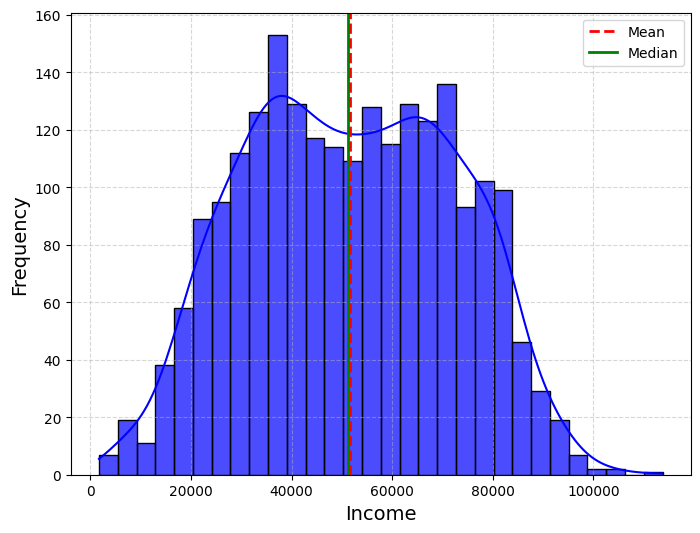

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(
    data_no_outliers['Income'],
    bins=30,
    kde=True,
    color='blue',
    edgecolor='black',
    alpha=0.7
)

# Lines for average and mean
plt.axvline(data_no_outliers['Income'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
plt.axvline(data_no_outliers['Income'].median(), color='green', linestyle='-', linewidth=2, label='Median')

plt.xlabel('Income', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

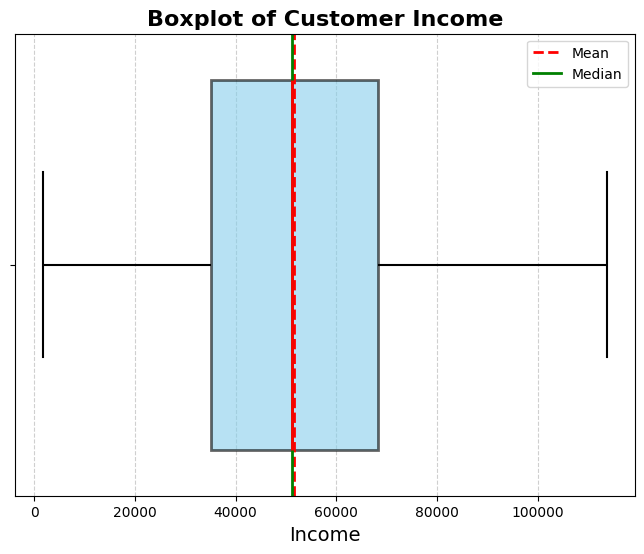

In [ ]:
plt.figure(figsize=(8,6))

# Advanced boxplot using Seaborn
sns.boxplot(
    x=data_no_outliers['Income'],
    color='lightblue',
    fliersize=5,          # size of outlier markers
    linewidth=2,          # line thickness
    boxprops=dict(facecolor='skyblue', alpha=0.6, edgecolor='black'),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='black', linewidth=1.5),
    capprops=dict(color='black', linewidth=1.5)
)

# Add title and labels
plt.title('Boxplot of Customer Income', fontsize=16, weight='bold')
plt.xlabel('Income', fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

# Add mean and annotations
mean_val = data_no_outliers['Income'].mean()
median_val = data_no_outliers['Income'].median()

# Lines for average and mean
plt.axvline(data_no_outliers['Income'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
plt.axvline(data_no_outliers['Income'].median(), color='green', linestyle='-', linewidth=2, label='Median')

plt.legend()
plt.show()

We repeat the analysis, but with the age column.

In [ ]:
print(data_no_outliers['Age'].describe())
#skewness
print(data_no_outliers['Age'].skew())
#kurtosis
print(data_no_outliers['Age'].kurtosis())

count    2208.000000
mean       46.192935
std        11.991913
min        19.000000
25%        38.000000
50%        45.000000
75%        56.000000
max       122.000000
Name: Age, dtype: float64
0.35006548981516367
0.7343770546461013


We see that the max for age is 122, which is either an error or a very isolated case, thus we procceed to delete the sample over 100.

In [ ]:
data_no_outliers = data_no_outliers[(data_no_outliers['Age'] < 100)]

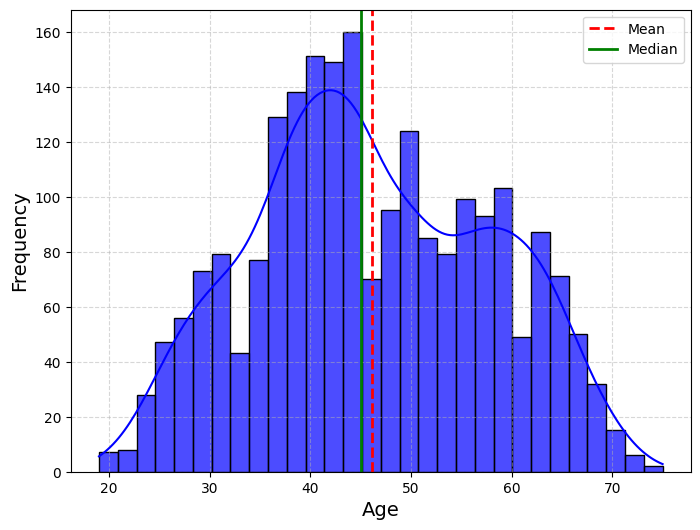

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(
    data_no_outliers['Age'],
    bins=30,
    kde=True,
    color='blue',
    edgecolor='black',
    alpha=0.7
)

# Lines for average and mean
plt.axvline(data_no_outliers['Age'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
plt.axvline(data_no_outliers['Age'].median(), color='green', linestyle='-', linewidth=2, label='Median')

plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

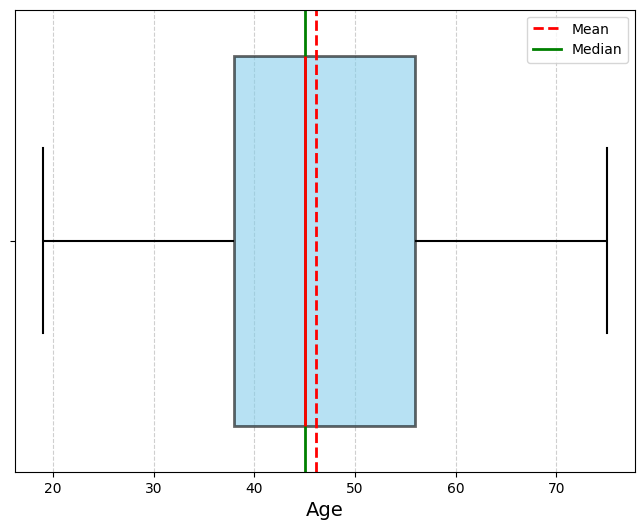

In [ ]:
plt.figure(figsize=(8,6))

# Advanced boxplot using Seaborn
sns.boxplot(
    x=data_no_outliers['Age'],
    color='lightblue',
    fliersize=5,          # size of outlier markers
    linewidth=2,          # line thickness
    boxprops=dict(facecolor='skyblue', alpha=0.6, edgecolor='black'),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='black', linewidth=1.5),
    capprops=dict(color='black', linewidth=1.5)
)

# Add labels
plt.xlabel('Age', fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

# Add mean and annotations
mean_val = data_no_outliers['Age'].mean()
median_val = data_no_outliers['Age'].median()

# Lines for average and mean
plt.axvline(data_no_outliers['Age'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
plt.axvline(data_no_outliers['Age'].median(), color='green', linestyle='-', linewidth=2, label='Median')

plt.legend()
plt.show()

Now, we repeat the same process with `Months_since_enrollement
`and `Total_mnt`

In [ ]:
print(data_no_outliers['Months_since_enrollement'].describe())
#skewness
print(data_no_outliers['Months_since_enrollement'].skew())
#kurtosis
print(data_no_outliers['Months_since_enrollement'].kurtosis())

count    2205.000000
mean       18.200454
std         6.654741
min         7.000000
25%        13.000000
50%        18.000000
75%        24.000000
max        30.000000
Name: Months_since_enrollement, dtype: float64
-0.015477008799926795
-1.2008668683167605


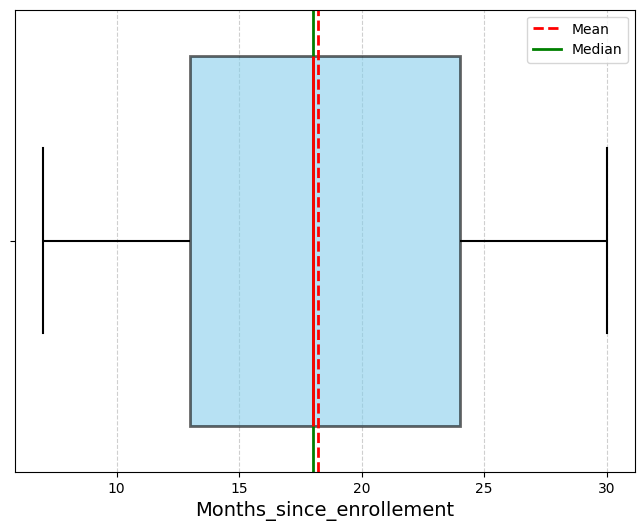

In [ ]:
plt.figure(figsize=(8,6))

# Advanced boxplot using Seaborn
sns.boxplot(
    x=data_no_outliers['Months_since_enrollement'],
    color='lightblue',
    fliersize=5,          # size of outlier markers
    linewidth=2,          # line thickness
    boxprops=dict(facecolor='skyblue', alpha=0.6, edgecolor='black'),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='black', linewidth=1.5),
    capprops=dict(color='black', linewidth=1.5)
)

# Add labels
plt.xlabel('Months_since_enrollement', fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

# Add mean and annotations
mean_val = data_no_outliers['Months_since_enrollement'].mean()
median_val = data_no_outliers['Months_since_enrollement'].median()

# Lines for average and mean
plt.axvline(data_no_outliers['Months_since_enrollement'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
plt.axvline(data_no_outliers['Months_since_enrollement'].median(), color='green', linestyle='-', linewidth=2, label='Median')

plt.legend()
plt.show()

In [ ]:
print(data_no_outliers['Total_mnt'].describe())
#skewness
print(data_no_outliers['Total_mnt'].skew())
#kurtosis
print(data_no_outliers['Total_mnt'].kurtosis())

count    2205.000000
mean      606.821769
std       601.675284
min         5.000000
25%        69.000000
50%       397.000000
75%      1047.000000
max      2525.000000
Name: Total_mnt, dtype: float64
0.8595515180247321
-0.3350656242349701


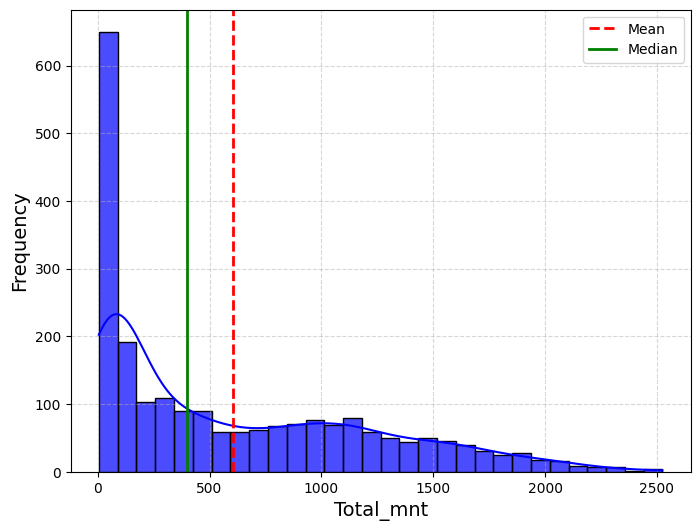

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(
    data_no_outliers['Total_mnt'],
    bins=30,
    kde=True,
    color='blue',
    edgecolor='black',
    alpha=0.7
)

# Lines for average and mean
plt.axvline(data_no_outliers['Total_mnt'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
plt.axvline(data_no_outliers['Total_mnt'].median(), color='green', linestyle='-', linewidth=2, label='Median')

plt.xlabel('Total_mnt', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

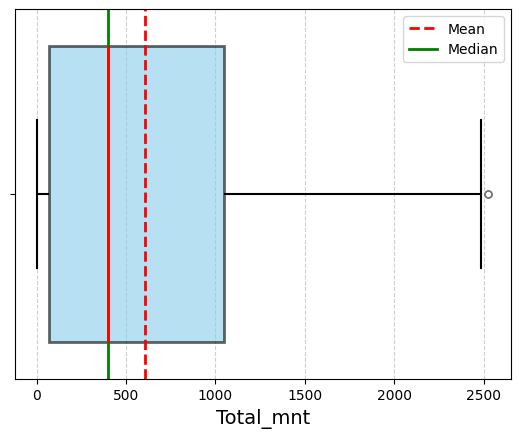

In [ ]:
# boxplot using Seaborn
sns.boxplot(
    x=data_no_outliers['Total_mnt'],
    color='lightblue',
    fliersize=5,          # size of outlier markers
    linewidth=2,          # line thickness
    boxprops=dict(facecolor='skyblue', alpha=0.6, edgecolor='black'),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='black', linewidth=1.5),
    capprops=dict(color='black', linewidth=1.5)
)

# Add labels
plt.xlabel('Total_mnt', fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

# Add mean and annotations
mean_val = data_no_outliers['Total_mnt'].mean()
median_val = data_no_outliers['Total_mnt'].median()

# Lines for average and mean
plt.axvline(data_no_outliers['Total_mnt'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
plt.axvline(data_no_outliers['Total_mnt'].median(), color='green', linestyle='-', linewidth=2, label='Median')

plt.legend()
plt.show()

After analysing numerical variables, we can move own to do the univariate analysis of categorical values. For this part, we will work with marital status, education level and child status.

               Frequency  Percentage (%)
Education                               
Postgraduate        1953           88.57
Undergraduate        252           11.43


/tmp/ipython-input-2346799259.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2346799259.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, val + 5, f'{val}\n({education_percent[i]:.1f}%)',


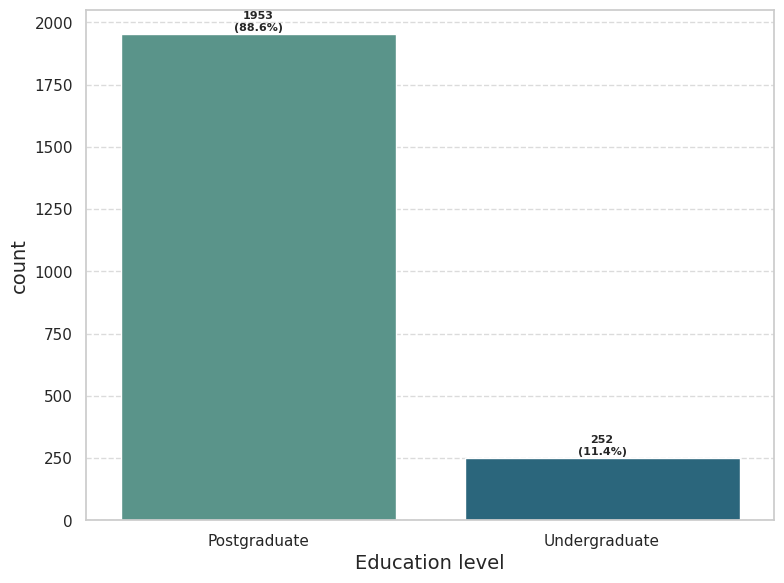

In [ ]:
# Absolute count and percent
education_counts = data_no_outliers['Education'].value_counts()
education_percent = data_no_outliers['Education'].value_counts(normalize=True) * 100

# Mostrar tabla resumen
edu_summary = pd.DataFrame({
    'Frequency': education_counts,
    'Percentage (%)': education_percent.round(2)
})
print(edu_summary)

# Config
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(8,6))

# Graph
sns.barplot(
    x=education_counts.index,
    y=education_counts.values,
    palette="crest"
)

# Adding values
for i, val in enumerate(education_counts.values):
    plt.text(i, val + 5, f'{val}\n({education_percent[i]:.1f}%)',
             ha='center', va='bottom', fontsize=8, weight='bold')

# Graph Settings
plt.xlabel('Education level', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.xticks(rotation=0, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

,Frequency,Porcentage (%)
Marital_Status,,
In couple,1430,64.53
Alone,786,35.47


/tmp/ipython-input-1262465250.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1262465250.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, val + 10, f'{val}\n({marital_percent[i]:.1f}%)',


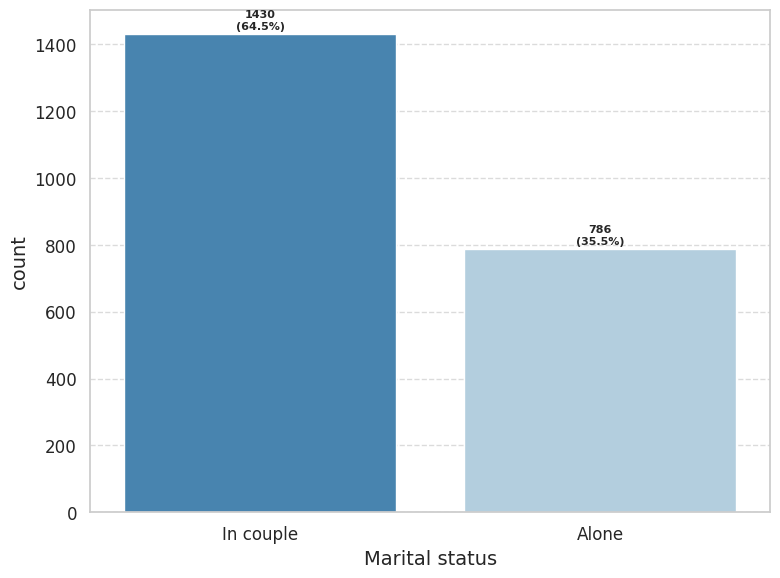

In [ ]:
# Count
marital_counts = data['Marital_Status'].value_counts()
marital_percent = data['Marital_Status'].value_counts(normalize=True) * 100

marital_summary = pd.DataFrame({
    'Frequency': marital_counts,
    'Porcentage (%)': marital_percent.round(2)
})
display(marital_summary)

#Configuration
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

plt.figure(figsize=(8,6))

# Barplot
sns.barplot(
    x=marital_counts.index,
    y=marital_counts.values,
    palette="Blues_r"
)

# Tags
for i, val in enumerate(marital_counts.values):
    plt.text(i, val + 10, f'{val}\n({marital_percent[i]:.1f}%)',
             ha='center', va='bottom', fontsize=8, weight='bold')

plt.xlabel('Marital status', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.xticks(rotation=0, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


           Frequency  Percentage (%)
Has_child                           
Has child       1577           71.52
No child         628           28.48


/tmp/ipython-input-3631003005.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3631003005.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, val + 5, f'{val}\n({child_percent[i]:.1f}%)',


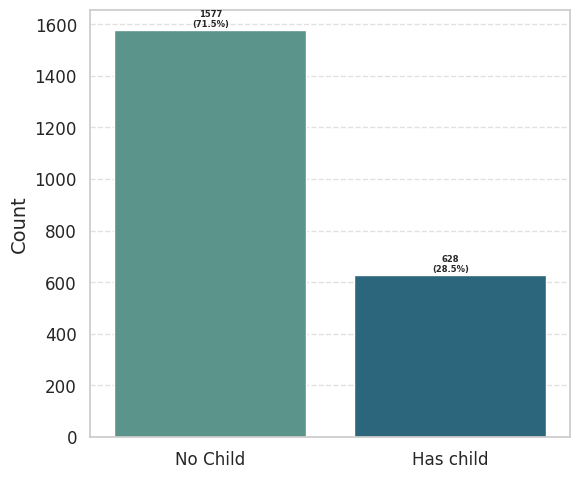

In [ ]:
child_counts = data_no_outliers['Has_child'].value_counts()
child_percent = data_no_outliers['Has_child'].value_counts(normalize=True) * 100

child_summary = pd.DataFrame({
    'Frequency': child_counts,
    'Percentage (%)': child_percent.round(2)
})
print(child_summary)

plt.figure(figsize=(6,5))
sns.barplot(
    x=['No Child', 'Has child'],
    y=child_counts.values,
    palette="crest"
)

for i, val in enumerate(child_counts.values):
    plt.text(i, val + 5, f'{val}\n({child_percent[i]:.1f}%)',
             ha='center', va='bottom', fontsize=6, weight='bold')


plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Correlations

In [ ]:
corr_dataset = data_no_outliers.corr(numeric_only=True)
print(corr_dataset)

                                ID  Year_Birth    Income   Kidhome  Teenhome  \
ID                        1.000000    0.007344  0.001633  0.002030 -0.003292   
Year_Birth                0.007344    1.000000 -0.212625  0.238083 -0.362919   
Income                    0.001633   -0.212625  1.000000 -0.531699  0.042483   
Kidhome                   0.002030    0.238083 -0.531699  1.000000 -0.040207   
Teenhome                 -0.003292   -0.362919  0.042483 -0.040207  1.000000   
Recency                  -0.046991   -0.014228  0.006716  0.011829  0.013881   
Wines                    -0.018822   -0.164438  0.730495 -0.499288  0.002783   
Fruits                    0.010178   -0.013149  0.537920 -0.374388 -0.176925   
Meat                     -0.001817   -0.041540  0.702500 -0.445665 -0.267177   
Fish                     -0.022333   -0.040855  0.551758 -0.389895 -0.206371   
Sweets                   -0.004428   -0.021075  0.555601 -0.379101 -0.164246   
Gold                     -0.008056   -0.

There is other way to analize correlation between attributes. Thus, we can use for this the pandas scatter_matrix() function which plots every numerical attribute against other numerical attribute. Based on the columns in the dataset, the variables that we aim to visualize are:
*   Income: To see how it relates to spending habits
*   Total_mnt: It's a key variable to see how it correlates with others.
*   Age: To explore if age influences spending or other behaviors.
*   Recency: To see if how recently a custumer purchased is related to other factors.

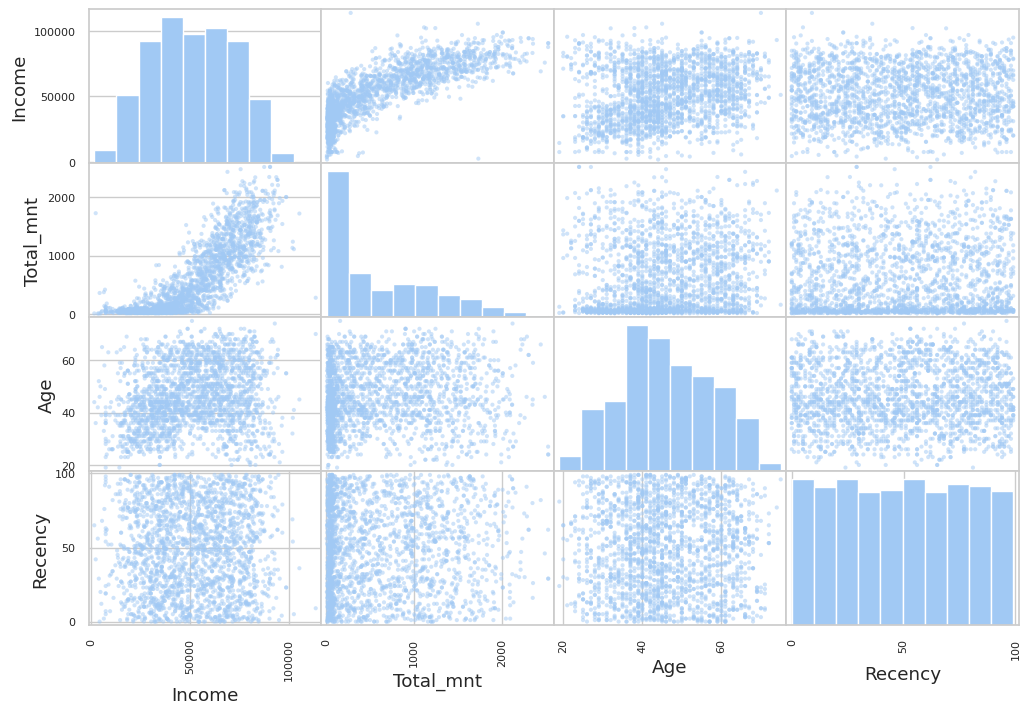

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = ["Income", "Total_mnt", "Age", "Recency"]
scatter_matrix(data_no_outliers[attributes], figsize=(12, 8))
plt.show()

Looking at the scatter matrix plot, we can mention the next insights
*   Income and Total_mnt: There appears to be a positive correlation between Income and Total_mnt because the scatter plot shows a general upward trend. This suggests that customers with higher incomes tend to spend more overall.
*   Age and Total_mnt: The relationship between Age and Total_mnt might be less clear-cut. We can see a scattered pattern, or perhaps a slight trend depending on the data.
*   Recency and Total_mnt: There doesn't seem to be a strong linear correlation between Recency (days since last purchase) and Total_mnt. This might indicate that the amount spent isn't directly tied to how recently a customer made a purchase.

## Unsupervised Exploration and Clustering


For this part, we will define the customer segments. We will use 4 different segments:


*   Stars: Old customers with high income and high spending nature.
*   Need Attention: New customers with below-average income and low spending nature.
*   High Potential: New customers with high income and high spending nature.
*   Leaky Bucket: Old customers with below-average income and a low spending nature.

To define and cluster data in these different groups, twp different approaches will be used. On one hand, the use of K-means algorithm, where K is 4, representing the four different segments. On the other, an unsupervised approach of neuronal networks, more particularly with Sfl-organized maps (SOM).

In [ ]:

# Scaling data
scaler = StandardScaler()
dataset_temp = data_no_outliers[['Income','Months_since_enrollement','Total_mnt']].copy()
X_std = scaler.fit_transform(dataset_temp)
X = normalize(X_std, norm='l2')

# --- Clustering K-MEANS ---
kmeans = KMeans(n_clusters=4, max_iter=2000, random_state=5, n_init=10)
labels = kmeans.fit_predict(X)
dataset_temp['Cluster'] = labels

# Renaming clusters
dataset_temp['Cluster'] = dataset_temp['Cluster'].replace({
    0: 'Stars',
    1: 'Need attention',
    2: 'High potential',
    3: 'Leaky bucket'
})

# Add clusters to original dataset
data_no_outliers['Cluster'] = dataset_temp['Cluster']

# statistiques
pd.options.display.float_format = lambda x: f"{x:.0f}"
summary = data_no_outliers[['Income','Months_since_enrollement','Total_mnt','Cluster']]
summary.set_index("Cluster", inplace=True)
summary = summary.groupby('Cluster').describe().transpose()
print(summary.head())

Cluster       High potential  Leaky bucket  Need attention  Stars
Income count             535           660             554    456
       mean            69279         37086           34968  72179
       std             11312         12261           12077   9937
       min             44802          1730            2447  50334
       25%             60776         28405           26490  65104


In [ ]:
#Plot
PLOT = go.Figure()
for C in list(data_no_outliers.Cluster.unique()):


    PLOT.add_trace(go.Scatter3d(x = data_no_outliers[data_no_outliers.Cluster == C]['Income'],
                                y = data_no_outliers[data_no_outliers.Cluster == C]['Months_since_enrollement'],
                                z = data_no_outliers[data_no_outliers.Cluster == C]['Total_mnt'],
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(C)))
PLOT.update_traces(hovertemplate='Income: %{x} <br>Seniority: %{y} <br>Spending: %{z}')


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Income', titlefont_color = 'black'),
                                yaxis=dict(title = 'Months_since_enrollement', titlefont_color = 'black'),
                                zaxis=dict(title = 'Total_mnt', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

In [ ]:
#Network definition
class SOM(nn.Module):
    def __init__(self, m, n, dim, lr=0.4, sigma=None):
        super().__init__()
        self.m = m
        self.n = n
        self.dim = dim

        if sigma is None:
            sigma = max(m, n) / 2

        self.sigma = sigma
        self.lr = lr

        # (m*n, dim)
        self.weights = nn.Parameter(torch.randn(m * n, dim))

        # grid coordinates
        self.locations = torch.stack(
            [torch.tensor([i, j]) for i in range(m) for j in range(n)]
        ).float()

    def forward(self, x):
        x = x.unsqueeze(1)  # (batch, 1, dim)
        dist = torch.sum((x - self.weights)**2, dim=2)  # (batch, nodes)
        return torch.argmin(dist, dim=1)

    def train_step(self, x):
        bmu_indices = self.forward(x)

        for idx, bmu in enumerate(bmu_indices):
            bmu_loc = self.locations[bmu]
            d = torch.sum((self.locations - bmu_loc)**2, dim=1)
            h = torch.exp(-d / (2 * self.sigma**2))
            delta = self.lr * h.unsqueeze(1) * (x[idx] - self.weights)
            self.weights.data += delta



In [ ]:
#Data prep-processing
scaler = StandardScaler()
dataset_temp = data_no_outliers[['Income','Months_since_enrollement','Total_mnt']].copy()

X_std = scaler.fit_transform(dataset_temp)
X = normalize(X_std, norm='l2')
X_torch = torch.tensor(X, dtype=torch.float32)


In [ ]:
som = SOM(m=10, n=10, dim=3, lr=0.3)

EPOCHS = 25
for epoch in range(EPOCHS):
    som.train_step(X_torch)


In [ ]:
# BMUs
bmus = som.forward(X_torch).numpy().reshape(-1, 1)

# reducing BMUs to 4 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=5)
labels = kmeans.fit_predict(bmus)

dataset_temp["Cluster"] = labels


In [ ]:
dataset_temp['Cluster'] = dataset_temp['Cluster'].replace({
    0: 'Stars',
    1: 'Need attention',
    2: 'High potential',
    3: 'Leaky bucket'
})


In [ ]:
data_no_outliers['Cluster'] = dataset_temp['Cluster']


In [ ]:
pd.options.display.float_format = lambda x: f"{x:.0f}"

summary = data_no_outliers[['Income','Months_since_enrollement','Total_mnt','Cluster']]
summary.set_index("Cluster", inplace=True)
summary = summary.groupby('Cluster').describe().transpose()

print(summary.head())


Cluster       High potential  Leaky bucket  Need attention  Stars
Income count             214           200             964    827
       mean            57254         44573           33858  72577
       std              9243          9897           12053  10079
       min             39747          2447            1730  48192
       25%             50489         37046           25100  65138


In [ ]:
PLOT = go.Figure()

for C in data_no_outliers.Cluster.unique():
    PLOT.add_trace(go.Scatter3d(
        x = data_no_outliers[data_no_outliers.Cluster == C]['Income'],
        y = data_no_outliers[data_no_outliers.Cluster == C]['Months_since_enrollement'],
        z = data_no_outliers[data_no_outliers.Cluster == C]['Total_mnt'],
        mode='markers',
        marker_size=6,
        marker_line_width=1,
        name=str(C)
    ))

PLOT.update_traces(
    hovertemplate='Income: %{x} <br>Seniority: %{y} <br>Spending: %{z}'
)

PLOT.update_layout(
    width=800, height=800, autosize=True, showlegend=True,
    scene=dict(
        xaxis=dict(title='Income'),
        yaxis=dict(title='Months_since_enrollement'),
        zaxis=dict(title='Total_mnt')
    ),
    font=dict(family="Gilroy", color='black', size=12)
)

PLOT.show()


## ML Baseline & Ensemble Models: Regression analysis






Based on the results from data exploration, in this section a regression analysis on the target variable "Total_mnt" will be performed in an attempt of predicting this variable on a selected number of variables. The first approach will be using polynomial regression.

After that, to potentially improve upon the baseline performance, an ensemble learning method will be implemented: XGBoost. These ensemble techniques are generally more robust and accurate for complex classification tasks compared to single linear models.



In [ ]:

# -----------------------------
# 1. Selecting variables
# -----------------------------
target = "Total_mnt"

numeric_features = [
    'Income','Gold','NumDealsPurchases','Web','Catalog','Store',
    'NumWebVisitsMonth','Age','Months_since_enrollement'
]

categorical_features = [
    'Education','Marital_Status','Has_child'
]

X = data_no_outliers[numeric_features + categorical_features]
y = data_no_outliers[target]

# -----------------------------
# 2. Preprocessing
# -----------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)

# -----------------------------
# 3. Pipeline
# -----------------------------
poly_degree = 2

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("poly", PolynomialFeatures(degree=poly_degree, include_bias=False)),
    ("regressor", LinearRegression())
])

# -----------------------------
# 4. Train–test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 5. Train model
# -----------------------------
model.fit(X_train, y_train)

# -----------------------------
# 6. Test
# -----------------------------
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² : {r2:.3f}")


RMSE: 216.75
R² : 0.869


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros



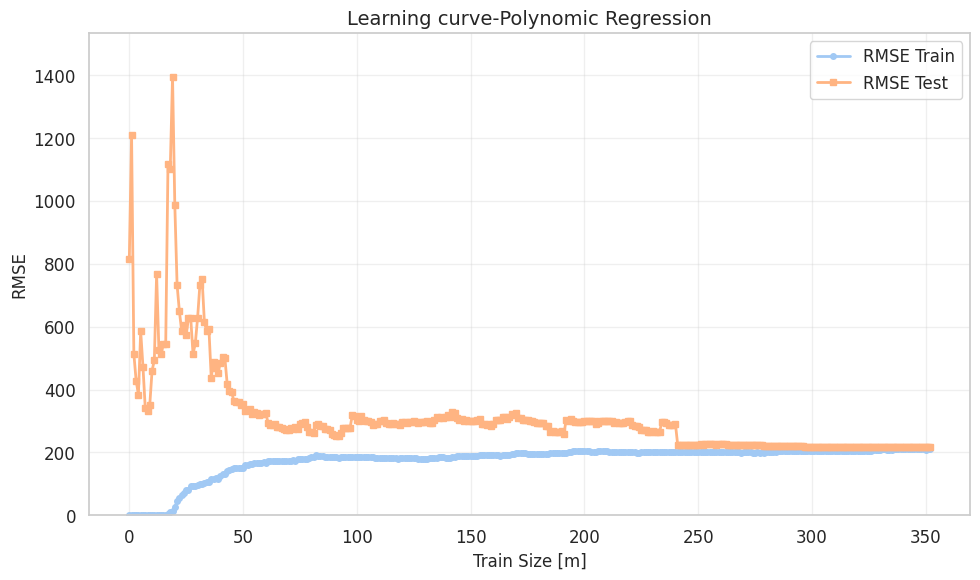

In [ ]:
train_errors, test_errors = [], []

# Sampling to smooth curve
step = max(1, len(X_train) // 300)

for m in range(1, len(X_train), step):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_test_predict = model.predict(X_test)

    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))

#RMSE
train_rmse = np.sqrt(train_errors)
test_rmse = np.sqrt(test_errors)

# Figure
plt.figure(figsize=(10, 6))

plt.plot(train_rmse, "o-", linewidth=2, markersize=4, label="RMSE Train")
plt.plot(test_rmse, "s-", linewidth=2, markersize=4, label="RMSE Test")

plt.title("Learning curve-Polynomic Regression", fontsize=14)
plt.xlabel("Train Size [m]", fontsize=12)
plt.ylabel("RMSE", fontsize=12)

plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.ylim(0, max(max(train_rmse), max(test_rmse)) * 1.1)

plt.tight_layout()
plt.show()


In [ ]:

# -----------------------------
# XGBoost baseline
# -----------------------------
xgb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("xgb", XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
    ))
])

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Baseline Results")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R² : {r2_xgb:.3f}")


XGBoost Baseline Results
RMSE: 187.28
R² : 0.902


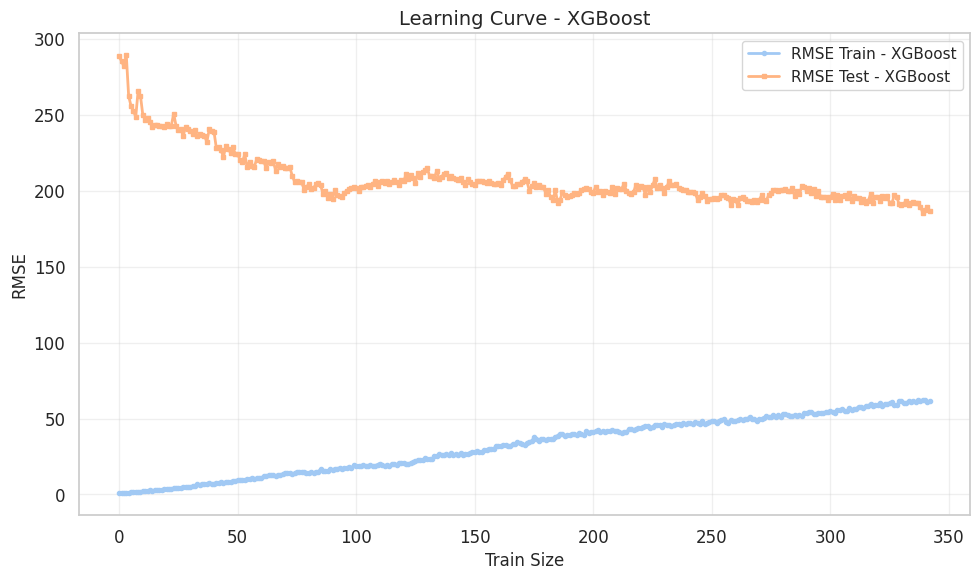

In [ ]:
train_errors, test_errors = [], []

# Sampling to smooth curve
step = max(1, len(X_train) // 300)  # reduce si quieres más puntos

for m in range(50, len(X_train), step):  # empieza en 50 para evitar inestabilidad inicial
    xgb_model.fit(X_train[:m], y_train[:m])
    y_train_predict = xgb_model.predict(X_train[:m])
    y_test_predict = xgb_model.predict(X_test)

    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))

# RMSE
train_rmse = np.sqrt(train_errors)
test_rmse = np.sqrt(test_errors)

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(10, 6))

plt.plot(train_rmse, "o-", linewidth=2, markersize=3, label="RMSE Train - XGBoost")
plt.plot(test_rmse, "s-", linewidth=2, markersize=3, label="RMSE Test - XGBoost")

plt.title("Learning Curve - XGBoost", fontsize=14)
plt.xlabel("Train Size", fontsize=12)
plt.ylabel("RMSE", fontsize=12)

plt.grid(alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

#Hyperparameter Tuning